<a href="https://colab.research.google.com/github/teoz97/DL_final/blob/master/DL_Final_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***LOAD LIBRARIES***

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution3D,MaxPooling3D,Flatten,Dropout
from keras.utils import np_utils
from numpy.random import seed
import random as r
from time import time
import numpy as np
import matplotlib.pyplot as plt

***LOAD AND NORMALIZE***

In [4]:
Start=time()
(xtrain, ytrain),(xtest, ytest)=cifar10.load_data()
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255
np.shape(xtrain)
np.shape(ytrain)
np.shape(xtest)
np.shape(ytest)
print("the dimesions of xtrain are: "+str(np.shape(xtrain))+"\nthe dimesions of ytrain are: " +str(np.shape(ytrain))+"\nthe dimesions of xtest are: " +str(np.shape(xtest))+"\nthe dimesions of ytest are: " +str(np.shape(ytest)))

170500096/170498071 [==============================] - 12s 0us/step
the dimesions of xtrain are: (50000, 32, 32, 3)
the dimesions of ytrain are: (50000, 1)
the dimesions of xtest are: (10000, 32, 32, 3)
the dimesions of ytest are: (10000, 1)


***SHOW IMAGE***

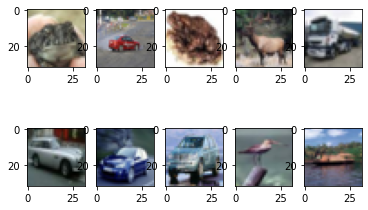

In [5]:
cont=25
for j in range(1,11,1):
    plt.subplot(2,5,j)
    plt.imshow(xtrain[cont])
    cont+=50
      

***RESHAPE AND TARGET***

In [6]:
Xtrain=xtrain.reshape(50000, 32, 32,3,1)
Xtest=xtest.reshape(10000, 32, 32,3,1)
Ytrain=np_utils.to_categorical(ytrain,10)
Ytest=np_utils.to_categorical(ytest,10)
i=r.randint(1,50000)
print(Xtrain.shape)
print(Ytrain.shape)
print(Ytrain[i])

(50000, 32, 32, 3, 1)
(50000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


***MODEL ALL METHOD***

In [11]:
model=Sequential()  
model.add(Convolution3D(filters=54,kernel_size=(3,3,1),input_shape=Xtrain.shape[1:],activation='relu'))
model.add(Convolution3D(filters=54,kernel_size=(3,3,1),activation='relu', padding='same',strides=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))
model.add(Dropout(0.25))
model.add(Convolution3D(filters=96,kernel_size=(3,3,1),activation='relu', padding='same',strides=(1, 1, 1)))
model.add(Convolution3D(filters=96,kernel_size=(3,3,1),activation='relu', padding='same',strides=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(60,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 30, 30, 3, 54)     540       
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 30, 30, 3, 54)     26298     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 15, 15, 3, 54)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 3, 54)     0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 15, 15, 3, 96)     46752     
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 15, 15, 3, 96)     83040     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 7, 7, 3, 96)      

***FIT AND FISNISH TIME***

In [12]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adadelta')
model.fit(Xtrain,Ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=1)
score=model.evaluate(Xtest,Ytest,verbose=1)
print('Test of Accuracy',score[1])

Finish=time()
Time=Finish-Start
print('The Time was: ',Time)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 75s 2ms/step - loss: 1.9456 - accuracy: 0.2801 - val_loss: 1.5646 - val_accuracy: 0.4420
Epoch 2/20
40000/40000 [==============================] - 68s 2ms/step - loss: 1.5283 - accuracy: 0.4570 - val_loss: 1.2581 - val_accuracy: 0.5676
Epoch 3/20
40000/40000 [==============================] - 68s 2ms/step - loss: 1.2833 - accuracy: 0.5487 - val_loss: 1.0895 - val_accuracy: 0.6129
Epoch 4/20
40000/40000 [==============================] - 68s 2ms/step - loss: 1.1038 - accuracy: 0.6180 - val_loss: 0.9277 - val_accuracy: 0.6753
Epoch 5/20
40000/40000 [==============================] - 68s 2ms/step - loss: 0.9752 - accuracy: 0.6680 - val_loss: 0.8620 - val_accuracy: 0.7081
Epoch 6/20
40000/40000 [==============================] - 68s 2ms/step - loss: 0.8705 - accuracy: 0.7039 - val_loss: 0.8922 - val_accuracy: 0.6939
Epoch 7/20
40000/40000 [==============================] - 68s 2ms/st

***LOAD IMAGE TEST***

In [13]:
from PIL import Image as im
from PIL import ImageFile
from google.colab import files as f
ImageFile.LOAD_TRUNCATED_IMAGE = True

uploaded=f.upload()

***RANDOM***

(32, 32, 3)


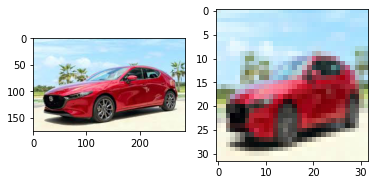

In [14]:
pic=str(r.randint(0,9))+'.jpg'
Image=im.open(pic)
plt.subplot(1,2,1)
plt.imshow(Image)
Image=Image.resize((32,32))
Image=np.array(Image)
print(np.shape(Image))
plt.subplot(1,2,2)
plt.imshow(Image)

***RESULT***

In [15]:
Img=Image.reshape(1,32,32,3,1)
img=Img.astype('float32')/255
result=model.predict_classes(img)
result[0]

1